# Crypto Pumps

This example demonstrates the flexibility of Fintuna. We want to predict short-term crypto pumps. In other words, we want to predict wich crypto asset are most likely to yield abnormally high returns within the next 24 hours. The assumption is that moderate price changes are random and hard to predict, but abnormal returns have patterns that can be captured. But we don't know exactly how extreme these returns must be. Should we try to predict the top 2% or the top 20% of returns? 

We use Fintuna to select the optimal value automatiaclly and further explore how profitable such a strategy would be. 

In [1]:
import optuna
from matplotlib import pyplot as plt
import shap
import fintuna as ft

Crypto assets are highly correlated. Therfore, if one asset is increasing in value, it's hard to say whether something happened to that particular asset or wether the overall market increased. Therefore, we are going to predict an asset's change in comparision to Bitcoin, which we use as a proxy of the crypto market. In other words, we are going to predict BTC-pairs and not USDT-pairs. As features we will returns, trading volume and sentiment provided by [cortecs.ai](https://cortecs.ai). We assume that social sentiment is highly connected with those crypto pumps. We ran some preprocessing steps (such as feature lagging) and packaged the data to be ready-to-use. 

In [2]:
data, data_specs = ft.data.get_btcpairs_with_social_sentiment()
print(f'Supported assets: {list(data.fin.asset_names)}')

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


Supported assets: ['ETHBTC', 'LTCBTC', 'XRPBTC', 'LINKBTC', 'BNBBTC', 'TRXBTC', 'XLMBTC', 'XTZBTC', 'ADABTC', 'EOSBTC', 'BCHBTC', 'XMRBTC', 'DASHBTC', 'NEOBTC', 'ATOMBTC', 'ZECBTC', 'BATBTC', 'VETBTC', 'SUSHIBTC', 'UNIBTC', 'AAVEBTC', 'ALGOBTC', 'DOTBTC', 'ETCBTC', 'SOLBTC', 'DOGEBTC', 'MATICBTC', 'HNTBTC', 'YFIBTC', 'ZILBTC']


The data has a sampling frequency of 3 hours (see `data_specs`) and ranges from 2020-01-02 to 2022-09-08.
The data contains 30 assets each having 107 features. 

The `Pumps` strategy is ready-to-use and we don't have to implement it ourselves. So, let's create a finstudy and `explore` how it performs. We use 100 tuning iterations and an ensemble size of 4 (this will take a while).

In [3]:
crypto_pumps_study = ft.FinStudy(ft.model.Pumps, data, data_specs=data_specs)
results = crypto_pumps_study.explore(n_trials=100, ensemble_size=4)

[I 2022-10-05 12:17:41,706] A new study created in memory with name: finstudy
INFO:train:start tuning
INFO:train:iteration 1/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.20547625125911342, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.20547625125911342
[LightGBM] [Warning] lambda_l2 is set=4.734989304499476, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.734989304499476
[LightGBM] [Warning] feature_fraction is set=0.6917207594128889, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6917207594128889


INFO:train:iteration 2/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.011498870747119453, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011498870747119453
[LightGBM] [Warning] lambda_l2 is set=3.146730406166005, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.146730406166005
[LightGBM] [Warning] feature_fraction is set=0.9350060741234096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9350060741234096


INFO:train:iteration 3/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.0269190582492607, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0269190582492607
[LightGBM] [Warning] lambda_l2 is set=6.823493012435792, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.823493012435792
[LightGBM] [Warning] feature_fraction is set=0.7073309699952618, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7073309699952618


INFO:train:iteration 4/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.6859416411328698, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6859416411328698
[LightGBM] [Warning] lambda_l2 is set=0.7092543214735834, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7092543214735834
[LightGBM] [Warning] feature_fraction is set=0.8409101495517417, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8409101495517417


INFO:train:iteration 5/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.0427708304996207, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0427708304996207
[LightGBM] [Warning] lambda_l2 is set=0.024365700014642007, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.024365700014642007
[LightGBM] [Warning] feature_fraction is set=0.6818553854713113, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6818553854713113


INFO:train:iteration 6/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.9105944026265278, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9105944026265278
[LightGBM] [Warning] lambda_l2 is set=0.05752740814116688, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05752740814116688
[LightGBM] [Warning] feature_fraction is set=0.6222127960008014, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6222127960008014


INFO:train:iteration 7/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=2.9038868465087937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9038868465087937
[LightGBM] [Warning] lambda_l2 is set=0.01955707167338675, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01955707167338675
[LightGBM] [Warning] feature_fraction is set=0.5480492039469815, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5480492039469815


INFO:train:iteration 8/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.0705376339063223, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0705376339063223
[LightGBM] [Warning] lambda_l2 is set=0.022939802981311864, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.022939802981311864
[LightGBM] [Warning] feature_fraction is set=0.559363859477122, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.559363859477122


INFO:train:iteration 9/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.3713164249534622, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3713164249534622
[LightGBM] [Warning] lambda_l2 is set=0.01913469447807098, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01913469447807098
[LightGBM] [Warning] feature_fraction is set=0.964648098788107, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.964648098788107


INFO:train:iteration 10/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.5748291778269797, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5748291778269797
[LightGBM] [Warning] lambda_l2 is set=0.011490069048873203, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011490069048873203
[LightGBM] [Warning] feature_fraction is set=0.5023477380962735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5023477380962735


INFO:train:iteration 11/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.03397496934343011, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03397496934343011
[LightGBM] [Warning] lambda_l2 is set=0.031024875513615338, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.031024875513615338
[LightGBM] [Warning] feature_fraction is set=0.6659066003490356, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6659066003490356


INFO:train:iteration 12/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.05349309180943708, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05349309180943708
[LightGBM] [Warning] lambda_l2 is set=0.5037313043161359, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5037313043161359
[LightGBM] [Warning] feature_fraction is set=0.8182100569901227, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8182100569901227


INFO:train:iteration 13/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.014282520212852269, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014282520212852269
[LightGBM] [Warning] lambda_l2 is set=1.210894543503055, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.210894543503055
[LightGBM] [Warning] feature_fraction is set=0.7226214847566242, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7226214847566242


INFO:train:iteration 14/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.01753371410220466, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01753371410220466
[LightGBM] [Warning] lambda_l2 is set=1.6388340561829011, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6388340561829011
[LightGBM] [Warning] feature_fraction is set=0.7471659942491279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7471659942491279


INFO:train:iteration 15/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.24537697515675197, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.24537697515675197
[LightGBM] [Warning] lambda_l2 is set=0.8906472277571434, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8906472277571434
[LightGBM] [Warning] feature_fraction is set=0.6479005304555753, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6479005304555753


INFO:train:iteration 16/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.136544822207028, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.136544822207028
[LightGBM] [Warning] lambda_l2 is set=0.7810332385035205, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7810332385035205
[LightGBM] [Warning] feature_fraction is set=0.9876185376677148, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9876185376677148


INFO:train:iteration 17/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.17273504893378766, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17273504893378766
[LightGBM] [Warning] lambda_l2 is set=1.0518854129010236, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0518854129010236
[LightGBM] [Warning] feature_fraction is set=0.9984610187253491, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9984610187253491


INFO:train:iteration 18/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.2114344179836255, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2114344179836255
[LightGBM] [Warning] lambda_l2 is set=0.1300948756800422, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1300948756800422
[LightGBM] [Warning] feature_fraction is set=0.6339531579379347, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6339531579379347


INFO:train:iteration 19/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.3021439851188847, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3021439851188847
[LightGBM] [Warning] lambda_l2 is set=0.6297953297351461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6297953297351461
[LightGBM] [Warning] feature_fraction is set=0.6942547419129222, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6942547419129222


INFO:train:iteration 20/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.10055387453915712, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10055387453915712
[LightGBM] [Warning] lambda_l2 is set=2.05277810989203, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.05277810989203
[LightGBM] [Warning] feature_fraction is set=0.9004996835435637, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9004996835435637


INFO:train:iteration 21/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.08569396269051299, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08569396269051299
[LightGBM] [Warning] lambda_l2 is set=2.7469232030064723, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7469232030064723
[LightGBM] [Warning] feature_fraction is set=0.9165634604370791, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9165634604370791


INFO:train:iteration 22/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.12005902980244439, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12005902980244439
[LightGBM] [Warning] lambda_l2 is set=2.3173839132873653, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3173839132873653
[LightGBM] [Warning] feature_fraction is set=0.8771571952255602, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8771571952255602


INFO:train:iteration 23/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=2.0308937164354885, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0308937164354885
[LightGBM] [Warning] lambda_l2 is set=1.810149029509641, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.810149029509641
[LightGBM] [Warning] feature_fraction is set=0.7714879974595785, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7714879974595785


INFO:train:iteration 24/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=1.2611434517874411, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2611434517874411
[LightGBM] [Warning] lambda_l2 is set=0.015145244464219507, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015145244464219507
[LightGBM] [Warning] feature_fraction is set=0.8572081541672554, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8572081541672554


INFO:train:iteration 25/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.0467887790252956, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0467887790252956
[LightGBM] [Warning] lambda_l2 is set=0.08451430447086973, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08451430447086973
[LightGBM] [Warning] feature_fraction is set=0.9495428348530233, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9495428348530233


INFO:train:iteration 26/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.02233994413858659, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02233994413858659
[LightGBM] [Warning] lambda_l2 is set=0.04562252472911889, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04562252472911889
[LightGBM] [Warning] feature_fraction is set=0.8898463705947042, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8898463705947042


INFO:train:iteration 27/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=5.617379703457789, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.617379703457789
[LightGBM] [Warning] lambda_l2 is set=0.16680694731769558, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16680694731769558
[LightGBM] [Warning] feature_fraction is set=0.9758081465782725, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9758081465782725


INFO:train:iteration 28/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.06437726532902585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06437726532902585
[LightGBM] [Warning] lambda_l2 is set=0.02703086921833599, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02703086921833599
[LightGBM] [Warning] feature_fraction is set=0.6067396193059242, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6067396193059242


INFO:train:iteration 29/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.03866648822595162, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03866648822595162
[LightGBM] [Warning] lambda_l2 is set=3.62648131037723, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.62648131037723
[LightGBM] [Warning] feature_fraction is set=0.5769896900593757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5769896900593757


INFO:train:iteration 30/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.030424229779956322, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.030424229779956322
[LightGBM] [Warning] lambda_l2 is set=0.3989557358413213, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3989557358413213
[LightGBM] [Warning] feature_fraction is set=0.9344000201871718, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9344000201871718


INFO:train:iteration 31/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=4.582189005771398, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.582189005771398
[LightGBM] [Warning] lambda_l2 is set=5.593019848903769, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.593019848903769
[LightGBM] [Warning] feature_fraction is set=0.5933753246927983, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5933753246927983


INFO:train:iteration 32/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=6.596726343736405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.596726343736405
[LightGBM] [Warning] lambda_l2 is set=0.2019277247984573, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2019277247984573
[LightGBM] [Warning] feature_fraction is set=0.5255720639312002, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5255720639312002


INFO:train:iteration 33/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.10626963358014806, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10626963358014806
[LightGBM] [Warning] lambda_l2 is set=4.676479425216478, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.676479425216478
[LightGBM] [Warning] feature_fraction is set=0.7974255387628557, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7974255387628557


INFO:train:iteration 34/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.4492534234363805, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4492534234363805
[LightGBM] [Warning] lambda_l2 is set=0.2675633968793296, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2675633968793296
[LightGBM] [Warning] feature_fraction is set=0.6784180509152884, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6784180509152884


INFO:train:iteration 35/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=3.7202728460065626, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7202728460065626
[LightGBM] [Warning] lambda_l2 is set=9.694480091704152, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.694480091704152
[LightGBM] [Warning] feature_fraction is set=0.9599000667485593, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9599000667485593


INFO:train:iteration 36/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=1.561876369180042, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.561876369180042
[LightGBM] [Warning] lambda_l2 is set=0.03654975538332128, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03654975538332128
[LightGBM] [Warning] feature_fraction is set=0.9063385628528641, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9063385628528641


INFO:train:iteration 37/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.143461969440152, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.143461969440152
[LightGBM] [Warning] lambda_l2 is set=0.11070416693573572, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11070416693573572
[LightGBM] [Warning] feature_fraction is set=0.7101642535702745, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7101642535702745


INFO:train:iteration 38/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.07637181343438959, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07637181343438959
[LightGBM] [Warning] lambda_l2 is set=3.050382438886939, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.050382438886939
[LightGBM] [Warning] feature_fraction is set=0.658040496784344, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.658040496784344


INFO:train:iteration 39/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.05479246225866155, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05479246225866155
[LightGBM] [Warning] lambda_l2 is set=2.542569186677031, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.542569186677031
[LightGBM] [Warning] feature_fraction is set=0.9822816430943002, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9822816430943002


INFO:train:iteration 40/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=9.064087365308254, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.064087365308254
[LightGBM] [Warning] lambda_l2 is set=1.3862700029444026, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3862700029444026
[LightGBM] [Warning] feature_fraction is set=0.6860587629010433, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6860587629010433


INFO:train:iteration 41/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.035713524125674155, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.035713524125674155
[LightGBM] [Warning] lambda_l2 is set=0.06775544256679884, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06775544256679884
[LightGBM] [Warning] feature_fraction is set=0.8354145245905529, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8354145245905529


INFO:train:iteration 42/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.04344212528498366, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04344212528498366
[LightGBM] [Warning] lambda_l2 is set=0.023080989034166628, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.023080989034166628
[LightGBM] [Warning] feature_fraction is set=0.8687117153913873, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8687117153913873


INFO:train:iteration 43/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.7597889228445306, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7597889228445306
[LightGBM] [Warning] lambda_l2 is set=2.0669416982419135, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0669416982419135
[LightGBM] [Warning] feature_fraction is set=0.9227698678785803, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9227698678785803


INFO:train:iteration 44/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.9629984915256034, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9629984915256034
[LightGBM] [Warning] lambda_l2 is set=0.010286838904883345, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010286838904883345
[LightGBM] [Warning] feature_fraction is set=0.9452760035871509, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9452760035871509


INFO:train:iteration 45/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.5368792923109108, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5368792923109108
[LightGBM] [Warning] lambda_l2 is set=1.5816006522655595, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5816006522655595
[LightGBM] [Warning] feature_fraction is set=0.8944562643508158, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8944562643508158


INFO:train:iteration 46/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.6913630897668681, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6913630897668681
[LightGBM] [Warning] lambda_l2 is set=0.017153986930822263, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.017153986930822263
[LightGBM] [Warning] feature_fraction is set=0.913755164923856, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.913755164923856


INFO:train:iteration 47/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.026252047243407597, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.026252047243407597
[LightGBM] [Warning] lambda_l2 is set=1.8017899902309504, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8017899902309504
[LightGBM] [Warning] feature_fraction is set=0.926858839010419, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.926858839010419


INFO:train:iteration 48/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.8267395869834959, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8267395869834959
[LightGBM] [Warning] lambda_l2 is set=2.186986617130794, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.186986617130794
[LightGBM] [Warning] feature_fraction is set=0.7365168737860741, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7365168737860741


INFO:train:iteration 49/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.09179362146184619, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09179362146184619
[LightGBM] [Warning] lambda_l2 is set=3.827539207479689, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.827539207479689
[LightGBM] [Warning] feature_fraction is set=0.6702781907970558, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6702781907970558


INFO:train:iteration 50/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.6239298168856927, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6239298168856927
[LightGBM] [Warning] lambda_l2 is set=3.132895348763738, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.132895348763738
[LightGBM] [Warning] feature_fraction is set=0.881169314636528, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.881169314636528


INFO:train:iteration 51/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.1215962881758849, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1215962881758849
[LightGBM] [Warning] lambda_l2 is set=0.33755030424905413, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33755030424905413
[LightGBM] [Warning] feature_fraction is set=0.9028107426448192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9028107426448192


INFO:train:iteration 52/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.06888570022601057, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06888570022601057
[LightGBM] [Warning] lambda_l2 is set=0.05302010640909458, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05302010640909458
[LightGBM] [Warning] feature_fraction is set=0.8917147528902328, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8917147528902328


INFO:train:iteration 53/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=1.0702404975167197, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0702404975167197
[LightGBM] [Warning] lambda_l2 is set=0.012959053721317781, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012959053721317781
[LightGBM] [Warning] feature_fraction is set=0.7832231053781572, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7832231053781572


INFO:train:iteration 54/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.10621357319809227, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10621357319809227
[LightGBM] [Warning] lambda_l2 is set=0.4626142597101413, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4626142597101413
[LightGBM] [Warning] feature_fraction is set=0.9115506830761293, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9115506830761293


INFO:train:iteration 55/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.36329515564232095, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.36329515564232095
[LightGBM] [Warning] lambda_l2 is set=0.5365699152137509, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5365699152137509
[LightGBM] [Warning] feature_fraction is set=0.9381753526188248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9381753526188248


INFO:train:iteration 56/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.05082303542046952, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05082303542046952
[LightGBM] [Warning] lambda_l2 is set=0.2326873358134527, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2326873358134527
[LightGBM] [Warning] feature_fraction is set=0.6424010763064351, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6424010763064351


INFO:train:iteration 57/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.08422871804886285, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08422871804886285
[LightGBM] [Warning] lambda_l2 is set=2.5451920198676348, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5451920198676348
[LightGBM] [Warning] feature_fraction is set=0.5579618619425525, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5579618619425525


INFO:train:iteration 58/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.06079807013822125, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06079807013822125
[LightGBM] [Warning] lambda_l2 is set=1.9160214678686245, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9160214678686245
[LightGBM] [Warning] feature_fraction is set=0.6172462023909383, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6172462023909383


INFO:train:iteration 59/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.09394981796709817, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09394981796709817
[LightGBM] [Warning] lambda_l2 is set=2.2925613579210578, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2925613579210578
[LightGBM] [Warning] feature_fraction is set=0.5404546307217981, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5404546307217981


INFO:train:iteration 60/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.1647756886114321, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1647756886114321
[LightGBM] [Warning] lambda_l2 is set=1.24738800881114, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.24738800881114
[LightGBM] [Warning] feature_fraction is set=0.919633868569594, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.919633868569594


INFO:train:iteration 61/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.1161926951079927, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1161926951079927
[LightGBM] [Warning] lambda_l2 is set=1.5859866393307878, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5859866393307878
[LightGBM] [Warning] feature_fraction is set=0.899690038629407, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.899690038629407


INFO:train:iteration 62/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.14060605405379364, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14060605405379364
[LightGBM] [Warning] lambda_l2 is set=0.2954514425468808, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2954514425468808
[LightGBM] [Warning] feature_fraction is set=0.9292498668711615, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9292498668711615


INFO:train:iteration 63/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.5051269222361068, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5051269222361068
[LightGBM] [Warning] lambda_l2 is set=0.7275349472916409, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7275349472916409
[LightGBM] [Warning] feature_fraction is set=0.5700149156361062, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5700149156361062


INFO:train:iteration 64/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.07509077166116644, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07509077166116644
[LightGBM] [Warning] lambda_l2 is set=0.37160869390659895, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.37160869390659895
[LightGBM] [Warning] feature_fraction is set=0.9076072395242141, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9076072395242141


INFO:train:iteration 65/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.042827747512972976, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.042827747512972976
[LightGBM] [Warning] lambda_l2 is set=0.32893872114410133, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.32893872114410133
[LightGBM] [Warning] feature_fraction is set=0.8101165553909153, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8101165553909153


INFO:train:iteration 66/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.031970867064556104, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.031970867064556104
[LightGBM] [Warning] lambda_l2 is set=0.4393861113855722, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4393861113855722
[LightGBM] [Warning] feature_fraction is set=0.8487068553696572, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8487068553696572


INFO:train:iteration 67/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.05807329565093798, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05807329565093798
[LightGBM] [Warning] lambda_l2 is set=0.3905654998619755, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3905654998619755
[LightGBM] [Warning] feature_fraction is set=0.9691996077196061, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9691996077196061


INFO:train:iteration 68/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.047428991257206135, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.047428991257206135
[LightGBM] [Warning] lambda_l2 is set=0.30192616663851596, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.30192616663851596
[LightGBM] [Warning] feature_fraction is set=0.951162215556163, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.951162215556163


INFO:train:iteration 69/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.038597794063685145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.038597794063685145
[LightGBM] [Warning] lambda_l2 is set=0.25093730620862775, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.25093730620862775
[LightGBM] [Warning] feature_fraction is set=0.8855368496955238, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8855368496955238


INFO:train:iteration 70/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.06698253571219699, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06698253571219699
[LightGBM] [Warning] lambda_l2 is set=6.859685198259267, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.859685198259267
[LightGBM] [Warning] feature_fraction is set=0.6019520356095726, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6019520356095726


INFO:train:iteration 71/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.05460286733204831, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05460286733204831
[LightGBM] [Warning] lambda_l2 is set=0.35641070463292224, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.35641070463292224
[LightGBM] [Warning] feature_fraction is set=0.9134336465332826, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9134336465332826


INFO:train:iteration 72/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.07788501364497015, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07788501364497015
[LightGBM] [Warning] lambda_l2 is set=0.4178662851037612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4178662851037612
[LightGBM] [Warning] feature_fraction is set=0.626546515266567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.626546515266567


INFO:train:iteration 73/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.09619223352999877, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09619223352999877
[LightGBM] [Warning] lambda_l2 is set=0.03248890694533264, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03248890694533264
[LightGBM] [Warning] feature_fraction is set=0.7560692946121939, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7560692946121939


INFO:train:iteration 74/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.062409006710856585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.062409006710856585
[LightGBM] [Warning] lambda_l2 is set=0.4974091662604162, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4974091662604162
[LightGBM] [Warning] feature_fraction is set=0.8968695342364716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8968695342364716


INFO:train:iteration 75/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.04968324748931851, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04968324748931851
[LightGBM] [Warning] lambda_l2 is set=0.38436789822218476, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.38436789822218476
[LightGBM] [Warning] feature_fraction is set=0.823347207306423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.823347207306423


INFO:train:iteration 76/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.03908281828453226, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03908281828453226
[LightGBM] [Warning] lambda_l2 is set=0.6064560450223592, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6064560450223592
[LightGBM] [Warning] feature_fraction is set=0.9038247248926001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9038247248926001


INFO:train:iteration 77/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.04458608771322836, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04458608771322836
[LightGBM] [Warning] lambda_l2 is set=0.33492684607847195, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33492684607847195
[LightGBM] [Warning] feature_fraction is set=0.8711852712727823, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8711852712727823


INFO:train:iteration 78/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.05600358050073217, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05600358050073217
[LightGBM] [Warning] lambda_l2 is set=0.2826433231059144, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2826433231059144
[LightGBM] [Warning] feature_fraction is set=0.922349354656129, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.922349354656129


INFO:train:iteration 79/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.0684875243487726, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0684875243487726
[LightGBM] [Warning] lambda_l2 is set=0.2713645950046752, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2713645950046752
[LightGBM] [Warning] feature_fraction is set=0.9405505998556417, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9405505998556417


INFO:train:iteration 80/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.060541327157042406, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.060541327157042406
[LightGBM] [Warning] lambda_l2 is set=0.20477554699638145, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20477554699638145
[LightGBM] [Warning] feature_fraction is set=0.9312680175217722, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9312680175217722


INFO:train:iteration 81/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.07631473452553497, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07631473452553497
[LightGBM] [Warning] lambda_l2 is set=0.17447071107072332, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17447071107072332
[LightGBM] [Warning] feature_fraction is set=0.9570425412963628, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9570425412963628


INFO:train:iteration 82/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.05224351788806521, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05224351788806521
[LightGBM] [Warning] lambda_l2 is set=0.1336224468469295, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1336224468469295
[LightGBM] [Warning] feature_fraction is set=0.9688521175658256, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9688521175658256


INFO:train:iteration 83/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=2.4324650727249737, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4324650727249737
[LightGBM] [Warning] lambda_l2 is set=0.22433398618141495, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.22433398618141495
[LightGBM] [Warning] feature_fraction is set=0.9480749191671349, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9480749191671349


INFO:train:iteration 84/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.06792898177645817, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06792898177645817
[LightGBM] [Warning] lambda_l2 is set=0.1628639487326175, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1628639487326175
[LightGBM] [Warning] feature_fraction is set=0.9381900807664668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9381900807664668


INFO:train:iteration 85/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.05958287588955613, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05958287588955613
[LightGBM] [Warning] lambda_l2 is set=0.18417495429773356, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18417495429773356
[LightGBM] [Warning] feature_fraction is set=0.9277854640766875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9277854640766875


INFO:train:iteration 86/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.08459009670035282, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08459009670035282
[LightGBM] [Warning] lambda_l2 is set=0.2523417988600931, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2523417988600931
[LightGBM] [Warning] feature_fraction is set=0.955825348852178, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.955825348852178


INFO:train:iteration 87/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.07298393388396081, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07298393388396081
[LightGBM] [Warning] lambda_l2 is set=0.21221404577563296, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21221404577563296
[LightGBM] [Warning] feature_fraction is set=0.9412444693239544, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9412444693239544


INFO:train:iteration 88/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.048632233524535676, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.048632233524535676
[LightGBM] [Warning] lambda_l2 is set=0.29783669596350937, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.29783669596350937
[LightGBM] [Warning] feature_fraction is set=0.9625988962999311, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9625988962999311


INFO:train:iteration 89/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.011237839358152358, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011237839358152358
[LightGBM] [Warning] lambda_l2 is set=0.24220663920242097, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24220663920242097
[LightGBM] [Warning] feature_fraction is set=0.9788522543185105, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9788522543185105


INFO:train:iteration 90/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.0854698231053426, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0854698231053426
[LightGBM] [Warning] lambda_l2 is set=0.09609149692236137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09609149692236137
[LightGBM] [Warning] feature_fraction is set=0.9184891533300789, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9184891533300789


INFO:train:iteration 91/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.06602725937190408, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06602725937190408
[LightGBM] [Warning] lambda_l2 is set=0.1609238691893088, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1609238691893088
[LightGBM] [Warning] feature_fraction is set=0.5129732474900021, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5129732474900021


INFO:train:iteration 92/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.057396559767251575, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.057396559767251575
[LightGBM] [Warning] lambda_l2 is set=0.14473687706020893, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14473687706020893
[LightGBM] [Warning] feature_fraction is set=0.9353044505960229, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9353044505960229


INFO:train:iteration 93/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.07617050894754239, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07617050894754239
[LightGBM] [Warning] lambda_l2 is set=0.02036693797019047, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02036693797019047
[LightGBM] [Warning] feature_fraction is set=0.7288665600119875, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7288665600119875


INFO:train:iteration 94/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.043046884054602046, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.043046884054602046
[LightGBM] [Warning] lambda_l2 is set=0.19594906817069369, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.19594906817069369
[LightGBM] [Warning] feature_fraction is set=0.9237032475121298, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9237032475121298


INFO:train:iteration 95/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.05284156022487713, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05284156022487713
[LightGBM] [Warning] lambda_l2 is set=0.22684088765021013, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.22684088765021013
[LightGBM] [Warning] feature_fraction is set=0.9479282780719389, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9479282780719389


INFO:train:iteration 96/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.06323914342841712, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06323914342841712
[LightGBM] [Warning] lambda_l2 is set=0.11198824952593986, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11198824952593986
[LightGBM] [Warning] feature_fraction is set=0.9155727998396084, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9155727998396084


INFO:train:iteration 97/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.03643185338243577, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03643185338243577
[LightGBM] [Warning] lambda_l2 is set=0.12923590706116572, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12923590706116572
[LightGBM] [Warning] feature_fraction is set=0.9324137092511472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9324137092511472


INFO:train:iteration 98/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.08712371707051, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08712371707051
[LightGBM] [Warning] lambda_l2 is set=0.07944058738298371, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07944058738298371
[LightGBM] [Warning] feature_fraction is set=0.5888050317007459, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5888050317007459


INFO:train:iteration 99/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.07353358858470889, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07353358858470889
[LightGBM] [Warning] lambda_l2 is set=0.06633871120948842, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06633871120948842
[LightGBM] [Warning] feature_fraction is set=0.9084159143101831, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9084159143101831


INFO:train:iteration 100/100
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.09623262059630483, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09623262059630483
[LightGBM] [Warning] lambda_l2 is set=4.302865175571905, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.302865175571905
[LightGBM] [Warning] feature_fraction is set=0.5512514548939376, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5512514548939376


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.FrozenTrial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.FrozenTrial.suggest_float` instead.


[LightGBM] [Warning] lambda_l1 is set=0.05600358050073217, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05600358050073217
[LightGBM] [Warning] lambda_l2 is set=0.2826433231059144, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2826433231059144
[LightGBM] [Warning] feature_fraction is set=0.922349354656129, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.922349354656129


suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.FrozenTrial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.FrozenTrial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.FrozenTrial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.FrozenTrial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optu

plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.


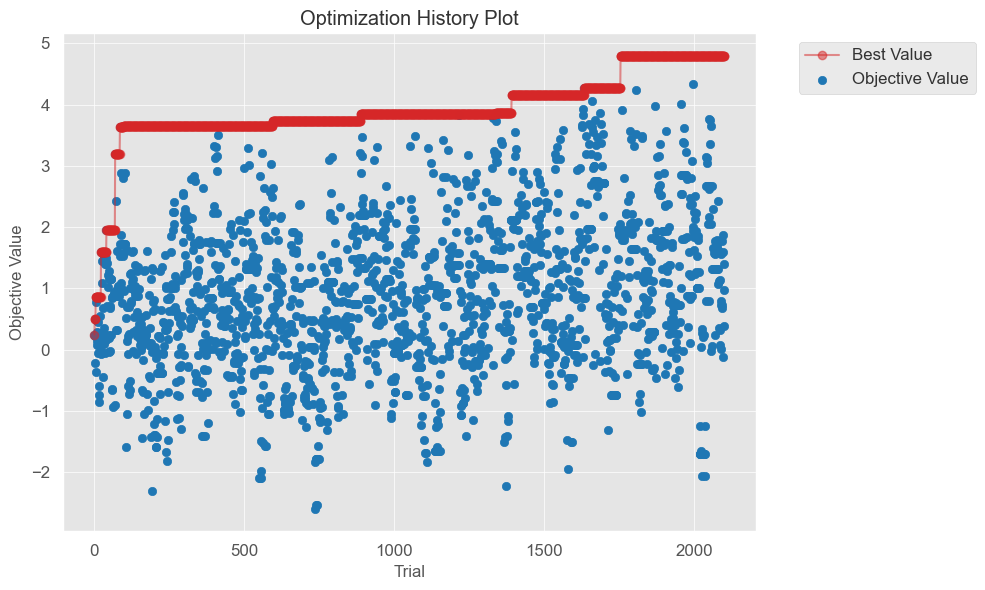

In [14]:
optuna.visualization.matplotlib.plot_optimization_history(crypto_pumps_study.study)
plt.tight_layout()

We see the outputs of all trials (`n_trials x conf_thrshold_trials`). We inspect that outputs tend to provide positive results with an average of 90% cumulative returns (0.9 on the y-axis). But the variance is high ranging from gains of 480% to losses of 260%. With `ensemble_size` set to 4, we will use the best 4 models to compute an out-of-sample backtest.

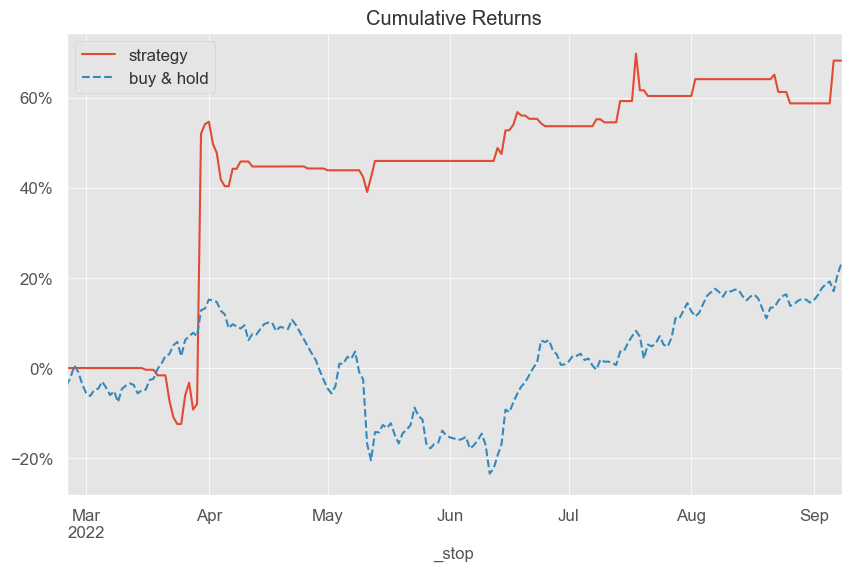

In [18]:
ft.utils.plot_backtest(results['performance'], results['benchmark'])
## to retrieve a detailed html-trading report
# ft.utils.create_tearsheet(results['performance'], results['benchmark'], 'crypto_pumps_tearsheet.html')

The backtest yields 68% cumulative returns. It seems to have detected a couple of pumps, among them the Zilliqa-pump at the end of April. Keep in mind that we are predicting BTC-pairs. So those returns are in BTC. If we would have used our strategy we would have ended up with +68% of BTC while buy-and-hold would have returned +23%.

In [6]:
metrics = ft.utils.get_performance_metrics(results['performance'], results['benchmark'])
metrics.loc[['Time in Market ', 'Total Return ', 'Sortino', 'Max Drawdown '], :]

,Strategy,Benchmark
Time in Market,0.25,1.0
Total Return,0.68,0.23
Sortino,5.78,1.38
Max Drawdown,-0.15,-0.34


By default Fintuna selects a confidence threshold when to enter a position. If this threshold is not reached, nothing is allocated which explains the `Time in Market` of 25%. Fintuna by design generates passive models with little exposure (this allows you to use stacking & yield farming while no trading opportunity is detected).
The `Sortino` of 5.78 and `Max Drawdown` of -15% indicate an excellent risk-return profile (since returns are in BTC we are still exposed to Bitcoin's volatility). 

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.


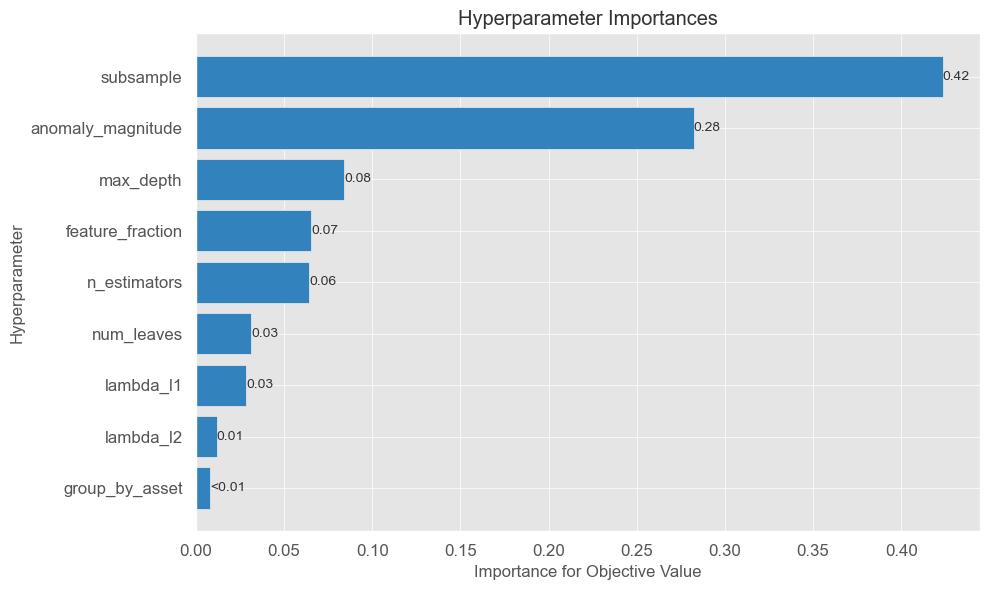

In [7]:
optuna.visualization.matplotlib.plot_param_importances(crypto_pumps_study.study)
plt.tight_layout()

By looking at the hyper-parameter importance, we see that subsampling and the threshold to label sometings as "pump" (= `anomaly_magnitude`) are essential .    

<AxesSubplot:xlabel='params_anomaly_magnitude', ylabel='value'>

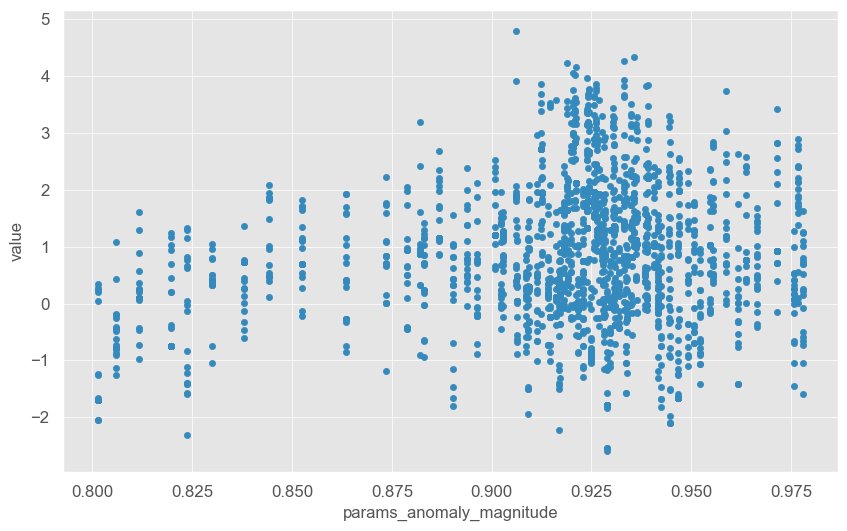

In [8]:
crypto_pumps_study.study.trials_dataframe().plot.scatter(x='params_anomaly_magnitude', y='value')

Looking closer, we see that the best performance is achieved by predicting the top 10-5% (0.9-0.95 on the x-axis) returns. 

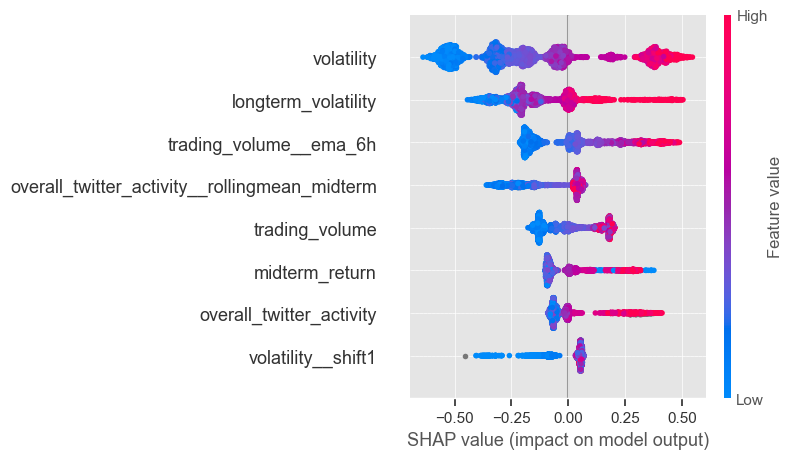

In [19]:
shap.summary_plot(results['shap'][0].values, results['shap'][2], max_display=8, show=False)
plt.tight_layout()

The most important features for detecting pumps are volatility-based. Of course the probability of an asset to yield abnormally high returns is dependend on it's volatility (the probability to yield abnormally low returns as well). I assume that top-level splits are based on past volatility while deeper splits take more subtle features such as *twitter activity* and *sentiment* into account. 